# ++pyqsar tutorial for multiple linear regression model++
### Sinyoung Kim
### crong24601@gmail.com
### Release : 06 December 2017
---

In [1]:
! python -V

Python 2.7.13 :: Anaconda custom (64-bit)


## Data load

In [2]:
import pandas as pd
sample_data = pd.read_csv('sample_data.csv',sep=",")

X_data = sample_data.iloc[:,1:-2]
y_data = sample_data.iloc[:,-2:-1]

In [3]:
X_data.head()

,MW,AMW,Sv,Se,Sp,Mv,Me,Mp,Mi,nAT,...,DLS_03,DLS_04,DLS_05,DLS_cons,LLS_01,LLS_02,MlogP_o,X3v_o,H-04_o,F01[C-C]_o
0,148.91,29.782,4.229,6.534,3.688,0.846,1.307,0.738,1.338,5,...,0.83,0.3,0.0,0.66,1.0,0.88,1.817,0.000,0,0
1,100.05,11.117,5.445,10.516,4.551,0.605,1.168,0.506,1.275,9,...,0.83,0.9,1.0,0.91,1.0,1.00,0.580,0.179,0,1
2,114.03,14.254,5.633,9.960,4.244,0.704,1.245,0.531,1.284,8,...,0.83,0.8,0.5,0.83,1.0,1.00,0.366,0.243,0,1
3,187.37,23.421,7.213,10.160,6.670,0.902,1.270,0.834,1.262,8,...,0.83,0.5,0.5,0.76,1.0,0.88,2.783,1.250,0,1
4,132.07,11.006,7.355,13.913,6.250,0.613,1.159,0.521,1.269,12,...,0.83,0.9,1.0,0.94,1.0,1.00,1.209,0.530,1,2


In [4]:
X_data.shape

(56, 1615)

In [5]:
y_data.head()

,pLC50
0,2.592
1,4.538
2,3.927
3,2.858
4,4.186


In [6]:
y_data.shape

(56, 1)

## Hello pyqsar!

In [7]:
import pyqsar

## Widget for data

In [8]:
from pyqsar import data_tools as dt

In [9]:
dt.SearchFeature(X_data)

<pyqsar.data_tools.SearchFeature instance at 0x0000000010227948>

In [10]:
%matplotlib inline
dt.ScatterMatrix(X_data)

<pyqsar.data_tools.ScatterMatrix instance at 0x0000000010238608>

## Remove empty feature

In [11]:
X_data.shape

(56, 1553)

In [12]:
X_data = dt.rm_empty_feature(X_data)

In [13]:
X_data.shape

(56, 1552)

## Remove NaN

In [15]:
X_data.shape

(56, 1552)

In [16]:
X_data = dt.rmNaN(X_data)

In [17]:
X_data.shape

(56, 1552)

## Data scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
header = list(X_data.columns.values)
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data_scaled, columns=header)

In [19]:
X_data.head()

,MW,AMW,Sv,Se,Sp,Mv,Me,Mp,Mi,nAT,...,DLS_03,DLS_04,DLS_05,DLS_cons,LLS_01,LLS_02,MlogP_o,X3v_o,H-04_o,F01[C-C]_o
0,0.147617,0.816056,0.000000,0.000000,0.038042,0.731458,0.929688,0.524946,0.772512,0.000000,...,0.0,0.000000,0.0,0.083333,1.0,0.52,0.330901,0.000000,0.0,0.000000
1,0.011145,0.093559,0.075406,0.137434,0.117151,0.115090,0.386719,0.021692,0.473934,0.181818,...,0.0,1.000000,1.0,0.777778,1.0,1.00,0.048803,0.062239,0.0,0.142857
2,0.050193,0.214988,0.087064,0.118244,0.089009,0.368286,0.687500,0.075922,0.516588,0.136364,...,0.0,0.833333,0.5,0.555556,1.0,1.00,0.000000,0.084492,0.0,0.142857
3,0.255042,0.569830,0.185043,0.125147,0.311394,0.874680,0.785156,0.733189,0.412322,0.136364,...,0.0,0.333333,0.5,0.361111,1.0,0.52,0.551197,0.434631,0.0,0.142857
4,0.100581,0.089262,0.193848,0.254677,0.272894,0.135550,0.351562,0.054230,0.445498,0.318182,...,0.0,1.000000,1.0,0.861111,1.0,1.00,0.192246,0.184284,0.5,0.285714


## Feature clustering for feature selection

In [20]:
from pyqsar import clustering as cl

In [20]:
# calculate cophenetic correlation coefficient 
cl.cophenetic(X_data)

average linkage cophenet: 0.766126815693
complete linkage cophenet: 0.767178530252
single linkage cophenet: 0.303907183415


In [20]:
# clustering
clust = cl.FeatureCluster(X_data, 'average', 3)
clust_info = clust.set_cluster()


Cluster 1 ['H3e', 'H3v'] 
Cluster 2 ['H3u'] 
Cluster 3 ['F03[C-F]'] 
Cluster 4 ['ATSC3e', 'ATSC2e'] 
Cluster 5 ['ATSC2s', 'Mor05e', 'ATSC3s', 'Mor10p', 'Mor10v'] 
Cluster 6 ['SIC0'] 
Cluster 7 ['CIC1'] 
Cluster 8 ['Mor08u', 'Mor08e'] 
Cluster 9 ['Mor27e', 'Mor27u'] 
Cluster 10 ['RDF035m', 'RDF035s', 'F03[F-F]'] 
Cluster 11 ['Eig13_AEA(ed)', 'Eig12_AEA(ed)', 'SpMax3_Bh(s)'] 
Cluster 12 ['F02[C-F]', 'H3s'] 
Cluster 13 ['H4s', 'H4v'] 
Cluster 14 ['H4m'] 
Cluster 15 ['RDF025m', 'RDF025s'] 
Cluster 16 ['F04[F-F]'] 
Cluster 17 ['DBI', 'SpAD_EA(dm)'] 
Cluster 18 ['MAXDN', 'P_VSA_MR_2', 'ATS2s'] 
Cluster 19 ['Chi_Dz(v)'] 
Cluster 20 ['Eig03_EA(dm)', 'ChiA_D/Dt'] 
Cluster 21 ['P_VSA_s_6'] 
Cluster 22 ['EE_B(s)', 'P_VSA_i_4', 'nF', 'RTs', 'P_VSA_LogP_5', 'SM1_Dz(i)', 'ATSC1s', 'ATSC1e', 'ATSC1i', 'SM1_Dz(e)', 'DELS', 'QXXs'] 
Cluster 23 ['SM1_Dz(v)', 'P_VSA_m_3', 'P_VSA_v_2', 'nHAcc', 'SpMAD_Dz(p)'] 
Cluster 24 ['Mor02m'] 
Cluster 25 ['Mor32u', 'Mor32e'] 
Cluster 26 ['Mor09u', 'Mor09e', 'Mor10u

Cluster 181 ['Psi_i_1s', 'Psi_i_t'] 
Cluster 182 ['SpMaxA_EA(dm)'] 
Cluster 183 ['SpDiam_AEA(ed)'] 
Cluster 184 ['R4p', 'TDB04p', 'TDB04r'] 
Cluster 185 ['B02[C-C]', 'TDB04u', 'TDB04i', 'TDB04e'] 
Cluster 186 ['JGI3'] 
Cluster 187 ['VE2_RG', 'TDB01s'] 
Cluster 188 ['VE2_G/D'] 
Cluster 189 ['TDB02s'] 
Cluster 190 ['Mor13v', 'Mor13p'] 
Cluster 191 ['Mor27v'] 
Cluster 192 ['Mor09p'] 
Cluster 193 ['Eig06_EA(dm)'] 
Cluster 194 ['IDDE'] 
Cluster 195 ['IC3'] 
Cluster 196 ['GATS5v'] 
Cluster 197 ['GATS5i'] 
Cluster 198 ['ATSC5v'] 
Cluster 199 ['SpMin4_Bh(m)'] 
Cluster 200 ['GATS6v'] 
Cluster 201 ['SpMin2_Bh(s)'] 
Cluster 202 ['R6m+', 'R6s+'] 
Cluster 203 ['R6u+', 'R6v+', 'R6e+'] 
Cluster 204 ['B05[C-F]', 'HATS6v', 'B04[C-C]', 'HATS6p', 'HATS6u', 'HATS6e'] 
Cluster 205 ['GATS5p'] 
Cluster 206 ['R6p+'] 
Cluster 207 ['HATS5s', 'HATS5m', 'TDB05s'] 
Cluster 208 ['B05[F-F]'] 
Cluster 209 ['R5m+', 'R5s+'] 
Cluster 210 ['CIC5'] 
Cluster 211 ['X5A', 'HATS5p', 'HATS5u'] 
Cluster 212 ['R5e+', 'R5u+', 'R5

Cluster 513 ['GATS4e'] 
Cluster 514 ['B02[F-Br]', 'F02[F-Br]'] 
Cluster 515 ['B03[Cl-Br]', 'B03[Br-Br]'] 
Cluster 516 ['T(Br..Br)', 'B02[Cl-Br]', 'F02[Cl-Br]', 'T(Cl..Br)', 'Br-093'] 
Cluster 517 ['Mor04p'] 
Cluster 518 ['Mor11m'] 
Cluster 519 ['Mor26m'] 
Cluster 520 ['Br-092', 'B02[Br-Br]'] 
Cluster 521 ['P_VSA_i_2'] 
Cluster 522 ['C-020', 'nR=Cp', 'nR=CX2'] 
Cluster 523 ['H0u'] 
Cluster 524 ['GATS3i'] 
Cluster 525 ['Br-095'] 
Cluster 526 ['F04[F-Cl]', 'F03[C-Cl]', 'B04[F-Cl]', 'B03[C-Cl]'] 
Cluster 527 ['F03[Cl-Cl]', 'B03[Cl-Cl]'] 
Cluster 528 ['T(F..Cl)', 'F02[C-Cl]', 'P_VSA_MR_7', 'T(Cl..Cl)'] 
Cluster 529 ['C-019', 'Cl-089', 'nR=Cs'] 
Cluster 530 ['nCXr=', 'nCrs'] 
Cluster 531 ['MATS4p', 'MATS4v'] 
Cluster 532 ['P_VSA_LogP_8'] 
Cluster 533 ['HATS1p'] 
Cluster 534 ['R3p'] 
Cluster 535 ['MATS3v', 'MATS3p'] 
Cluster 536 ['MATS3i'] 
Cluster 537 ['GATS2v'] 
Cluster 538 ['E2p'] 
Cluster 539 ['GATS2p'] 
Cluster 540 ['GATS3p', 'GATS3v'] 
Cluster 541 ['MATS2v'] 
Cluster 542 ['MATS2p'] 
Clu

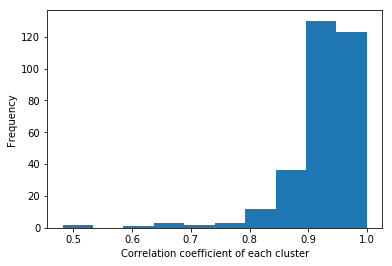

In [21]:
clust.cluster_dist()

## Feature selection_using single core

In [71]:
from pyqsar import feature_selection_single as fss
select = fss.selection(X_data, y_data, clust_info, model='regression', learning=10000, bank=200, component=4)

Start time :  20:00:57
Regression
1000 => 20:03:28 [0.80943872935200234, ['H-048', 'Mor18m', 'SpDiam_AEA(dm)', 'TPSA(NO)']]
2000 => 20:06:00 [0.80943872935200234, ['H-04_o', 'Mor18m', 'SpDiam_AEA(dm)', 'TPSA(NO)']]
3000 => 20:08:35 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
4000 => 20:11:08 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
5000 => 20:13:39 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
6000 => 20:16:11 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
7000 => 20:18:43 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
8000 => 20:21:15 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
9000 => 20:23:47 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
10000 => 20:26:20 [0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
[0.84473964698398174, ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']]
Model's cluster info [576, 293, 32, 

In [21]:
select 

## Feature selection_using multi core

In [24]:
from pyqsar import feature_selection_multi as fsm
select_m = fsm.MultiSelection(X_data, y_data, clust_info, model='regression', learning=10000, bank=200, component=4)

Regression


In [ ]:
select_m.run(n_job=5, run_job=3) #run_job : Number of times to perform the selection function

## Export model

In [23]:
from pyqsar import export_model as em
feature_set = select
mymodel = em.ModelExport(X_data,y_data, feature_set)

In [26]:
mymodel.features_table()

,H-04_o,Mor18m,P_VSA_p_1,RDF015s,pLC50
0,0.0,0.932101,0.000000,0.000000,2.592
1,0.0,0.626128,0.104914,0.212544,4.538
2,0.0,0.680275,0.000000,0.122093,3.927
3,0.0,0.543618,0.000000,0.072732,2.858
4,0.5,0.593898,0.224035,0.332724,4.186
5,0.0,0.775247,0.000000,0.032654,1.589
6,0.0,0.495058,0.262279,0.311124,3.200
7,0.0,0.498496,0.209824,0.370525,5.368
8,0.0,0.580146,0.209824,0.393053,5.337
9,0.0,0.525999,0.209824,0.301533,3.956


,H-04_o,Mor18m,P_VSA_p_1,RDF015s,pLC50
H-04_o,1.000000,0.096735,-0.090698,-0.216183,-0.639267
Mor18m,0.096735,1.000000,-0.568494,-0.510991,0.065926
P_VSA_p_1,-0.090698,-0.568494,1.000000,0.935627,0.189422
RDF015s,-0.216183,-0.510991,0.935627,1.000000,0.462640
pLC50,-0.639267,0.065926,0.189422,0.462640,1.000000


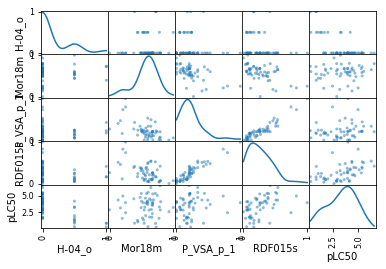

In [27]:
mymodel.model_corr()

In [28]:
mymodel.mlr()

Model features:  ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']
Coefficients:  [[ -2.15334404   1.79614395 -11.15949568  13.57515594]]
Intercept:  [ 1.45852127]
RMSE: 0.600255
R^2: 0.844740


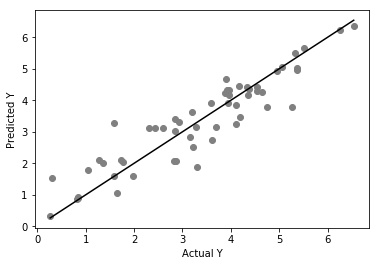

In [29]:
mymodel.train_plot()

In [30]:
mymodel.train_plot_inter()

Loading BokehJS ...

## Cross validation

R^2CV mean: 0.846486
Q^2CV mean: 0.835316
RMSE CV : 0.625458
Features set = ['H-04_o', 'Mor18m', 'P_VSA_p_1', 'RDF015s']
Model coeff =  [[ -2.12481609   2.01175677 -10.96239352  12.95344044]]
Model intercept =  [ 1.80146379]


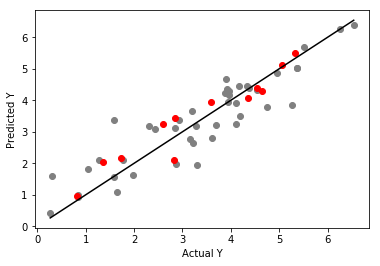

In [31]:
from pyqsar import cross_validation as cv
cv.k_fold(X_data, y_data, feature_set, k=5, run=100)

## Draw molecule

In [32]:
from pyqsar import draw_mol as dm
draw = dm.DrawMols('sample_sdf.sdf')

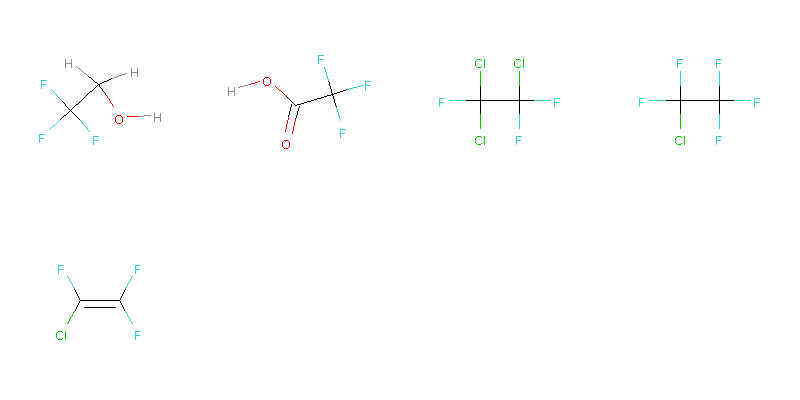

In [35]:
draw.show(index=[1,2,3,4,5])

In [34]:
commonsub=draw.common_substr(index=[1,2,3,4,5])

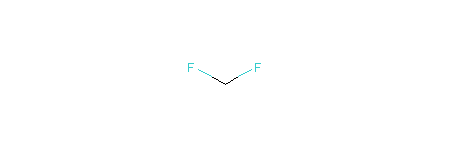

In [36]:
draw.show_substr(commonsub)